In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
### We can import the data set in another way via a downloaded csv file in the same Dir as this Jupyter kernel (program file)
### The dataframe name is now df
df = pd.read_csv('cruise_ship_info.csv')

In [3]:
df.head()
### This returns the first 5 rows of the dataframe df

,Ship_name,Cruise_line,Age,TonnageGTx1000,passengersx100,lengthx100ft,cabinsx100,spaceratio,crewx100
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00


In [4]:
np.shape(df)
### This returns the dimension of the tabular dataframe, i.e. 158 rows of ships' data, 9 columns excepting index

(158, 9)

In [5]:
# Let's summarize the data to see the distribution of data
print(df.describe())
### The behaviour of describe() is different with series of strings. giving count of values, top and freq of occurrence
### Here it avoids the count of Ship_name and Cruise_line, so these cols do not appear

              Age  TonnageGTx1000  passengersx100  lengthx100ft  cabinsx100  \
count  158.000000      158.000000      158.000000    158.000000  158.000000   
mean    15.689873       71.284671       18.457405      8.130633    8.830000   
std      7.615691       37.229540        9.677095      1.793474    4.471417   
min      4.000000        2.329000        0.660000      2.790000    0.330000   
25%     10.000000       46.013000       12.535000      7.100000    6.132500   
50%     14.000000       71.899000       19.500000      8.555000    9.570000   
75%     20.000000       90.772500       24.845000      9.510000   10.885000   
max     48.000000      220.000000       54.000000     11.820000   27.000000   

       spaceratio    crewx100  
count  158.000000  158.000000  
mean    39.900949    7.794177  
std      8.639217    3.503487  
min     17.700000    0.590000  
25%     34.570000    5.480000  
50%     39.085000    8.150000  
75%     44.185000    9.990000  
max     71.430000   21.000000  


In [6]:
df.isnull().sum()  
### this is to check if there is any missing data in the index and other columns -- none or '0'

Ship_name         0
Cruise_line       0
Age               0
TonnageGTx1000    0
passengersx100    0
lengthx100ft      0
cabinsx100        0
spaceratio        0
crewx100          0
dtype: int64

In [7]:
### Drop first 2 columns of dataframe
df = df.iloc[: , 2:] ### i.e. drop col 0 and col 1, start with col "2"
### Redo summary statistics
df.head()
### Now there are 7 variables or features

,Age,TonnageGTx1000,passengersx100,lengthx100ft,cabinsx100,spaceratio,crewx100
0,6,30.277,6.94,5.94,3.55,42.64,3.55
1,6,30.277,6.94,5.94,3.55,42.64,3.55
2,26,47.262,14.86,7.22,7.43,31.80,6.70
3,11,110.000,29.74,9.53,14.88,36.99,19.10
4,17,101.353,26.42,8.92,13.21,38.36,10.00


C:\Users\kglim\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


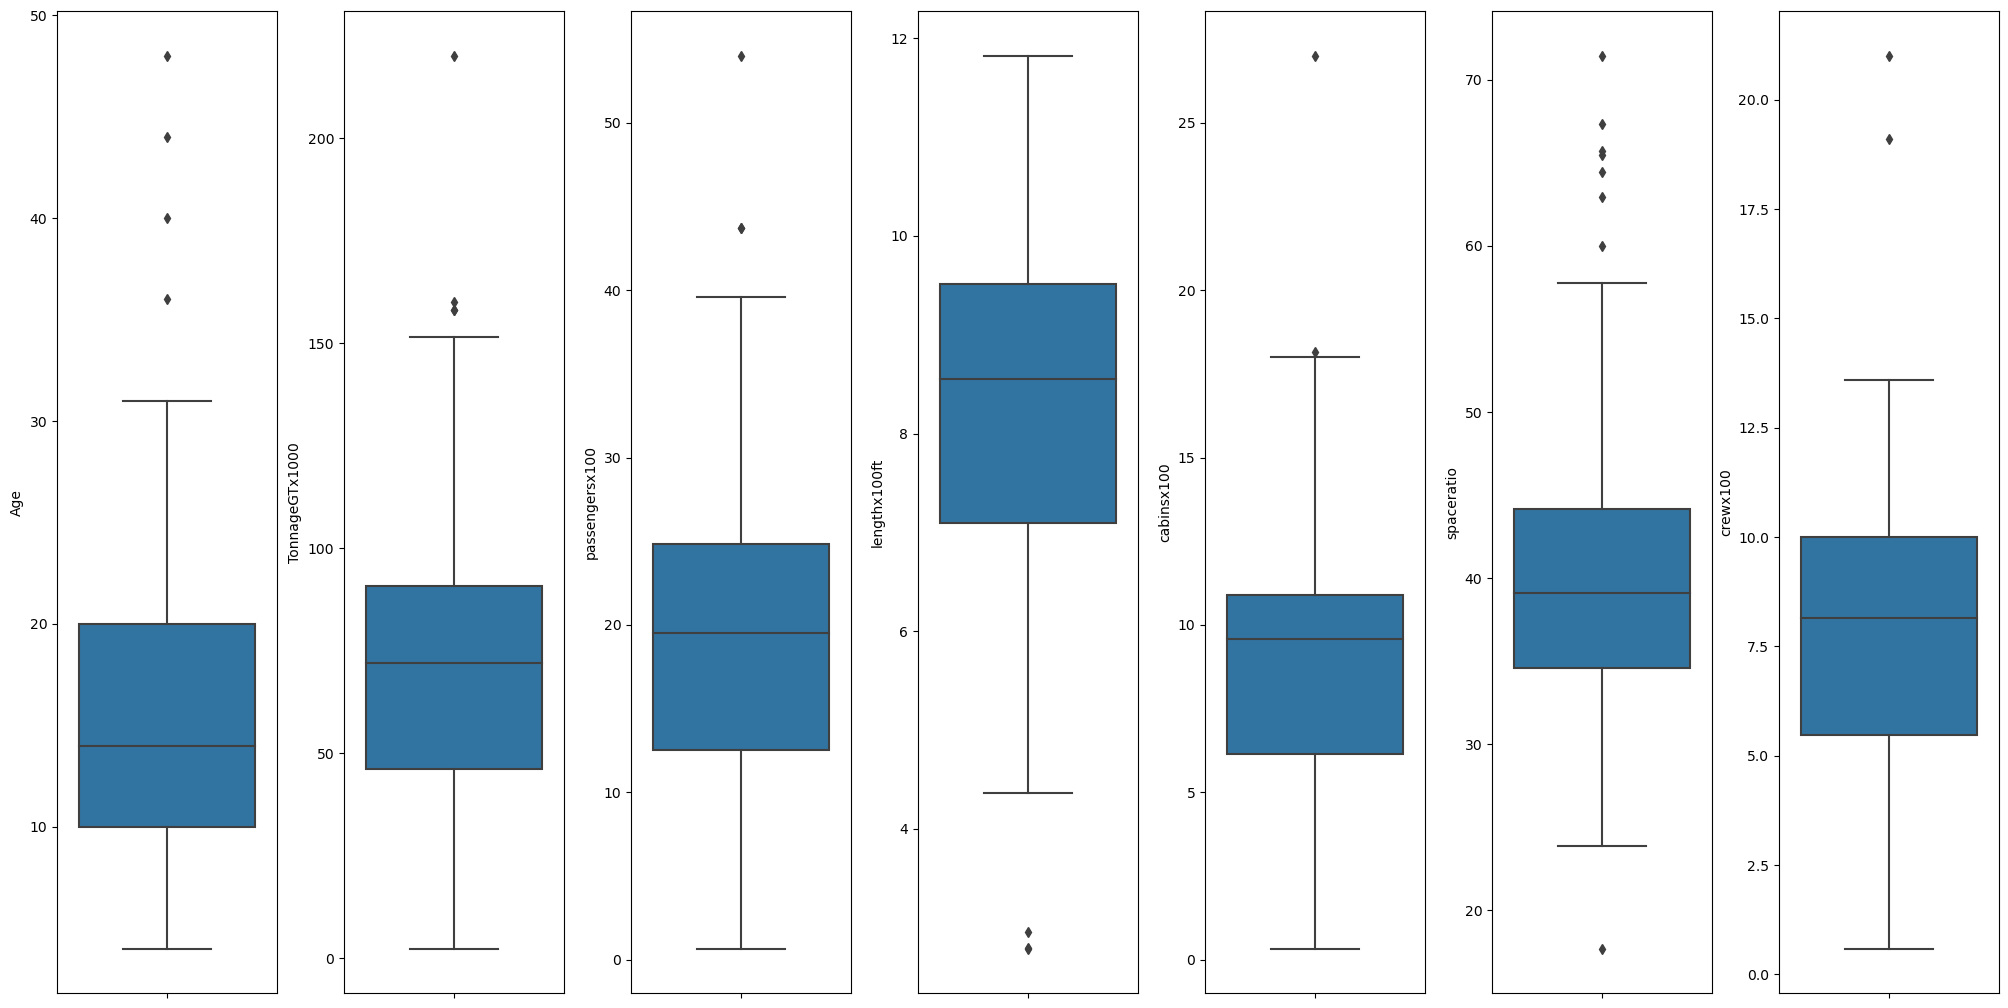

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

fig, axs = plt.subplots(ncols=7, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():               
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
### In the boxplot, centerline is mean, upper and lower box edges are the 75th and 25th percentiles. 
### Whiskers connect to "max" [75% + 1.5* interquartile range IQR] and "min" [25% - 1.5* IQR] (shorter horizontal lines)
### Outliers are shown as dots outside the whiskers. 
### See also https://seaborn.pydata.org/generated/seaborn.boxplot.html

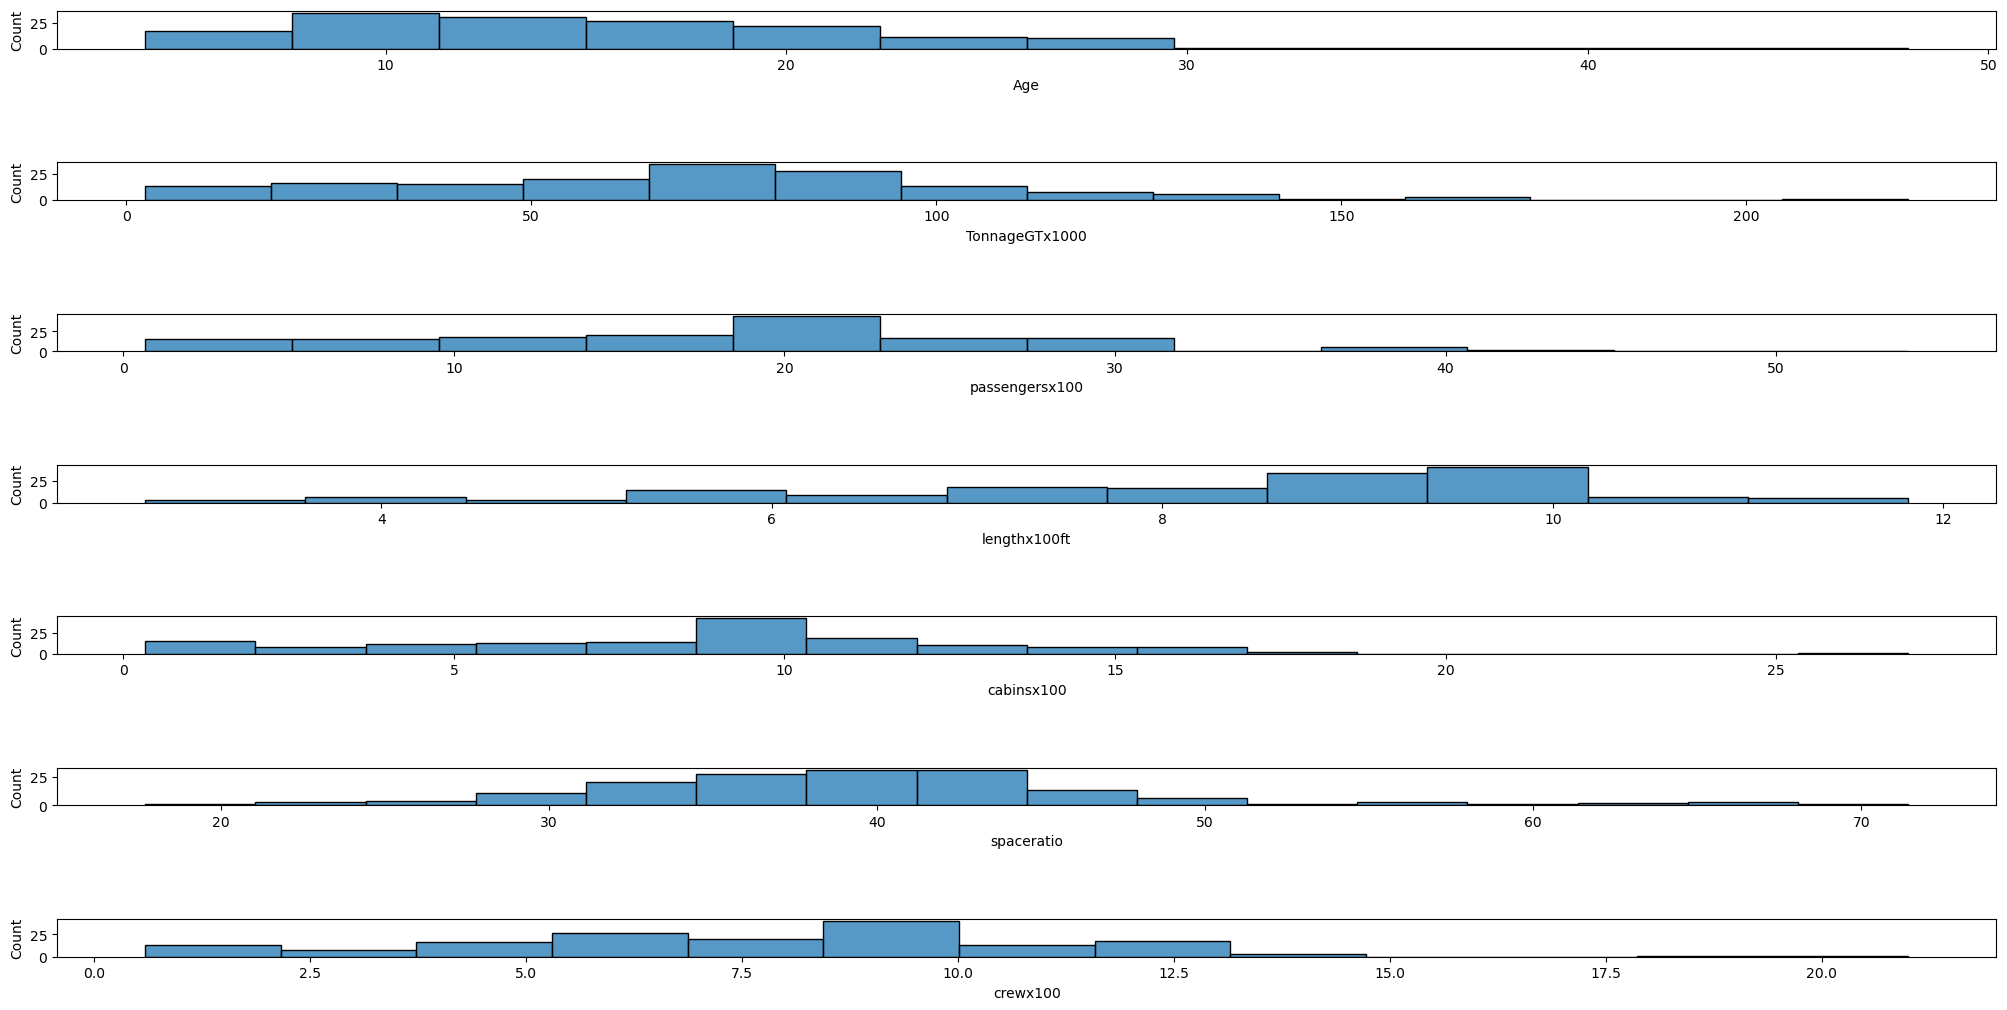

In [9]:
fig, axs = plt.subplots(ncols=1, nrows=7, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
   sns.histplot(v, ax=axs[index])
   index += 1 
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [10]:
cols = ['Age', 'TonnageGTx1000', 'passengersx100', 'lengthx100ft', 'cabinsx100','spaceratio','crewx100']
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler() ### this function demans and scale all variables to variance of 1
X_std = stdsc.fit_transform(df[cols].iloc[:,range(0,7)].values)

<AxesSubplot:ylabel='Count'>

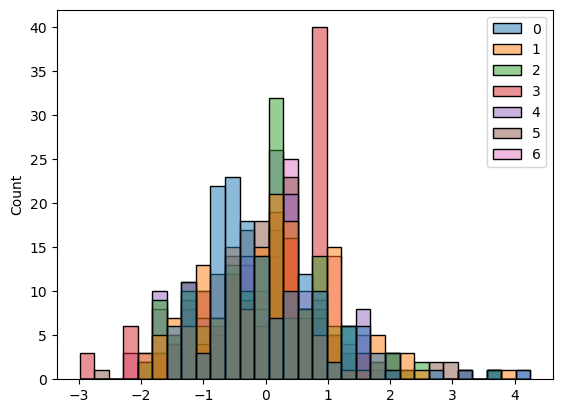

In [11]:
sns.histplot(X_std)

In [12]:
df2 = pd.DataFrame(X_std) ### need to convert numpy array back to Python dataframe in order to use next code

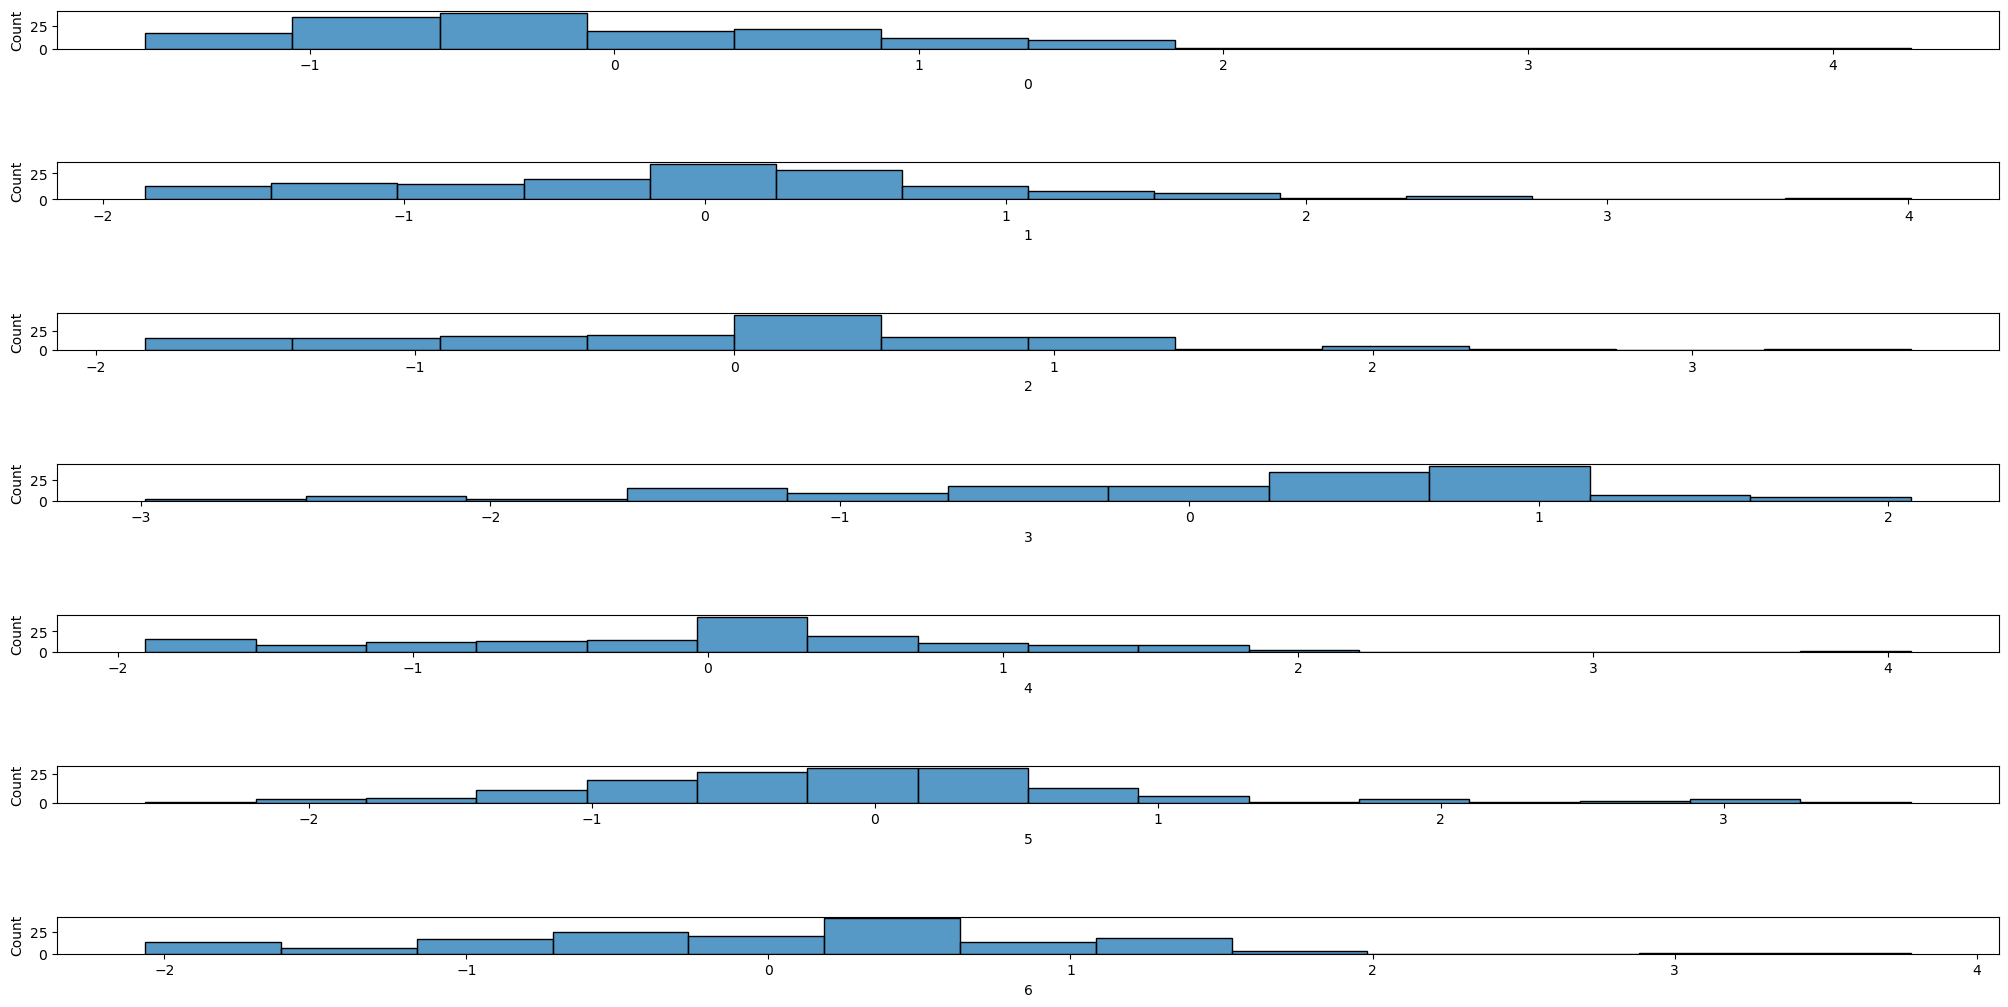

In [13]:
fig, axs = plt.subplots(ncols=1, nrows=7, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df2.items():
   sns.histplot(v, ax=axs[index])
   index += 1 
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [14]:
df2.columns =['Age', 'TonnageGTx1000', 'passengersx100', 'lengthx100ft', 'cabinsx100','spaceratio','crewx100']
print(df2)

          Age  TonnageGTx1000  passengersx100  lengthx100ft  cabinsx100  \
0   -1.276402       -1.104984       -1.193956     -1.225331   -1.184588   
1   -1.276402       -1.104984       -1.193956     -1.225331   -1.184588   
2    1.358105       -0.647310       -0.372926     -0.509363   -0.314095   
3   -0.617775        1.043215        1.169614      0.782736    1.357341   
4    0.172577        0.810215        0.825445      0.441533    0.982670   
..        ...             ...             ...           ...         ...   
153  0.831204       -1.830796       -1.844975     -2.987284   -1.907008   
154 -0.222599        0.148615        0.118448      0.368817    0.188457   
155  1.226380       -1.776662       -1.749603     -2.086730   -1.815023   
156  1.489831       -1.776662       -1.740273     -2.086730   -1.815023   
157  0.962929       -1.523507       -1.594104     -1.096680   -1.631052   

     spaceratio  crewx100  
0      0.318057 -1.215267  
1      0.318057 -1.215267  
2     -0.940676

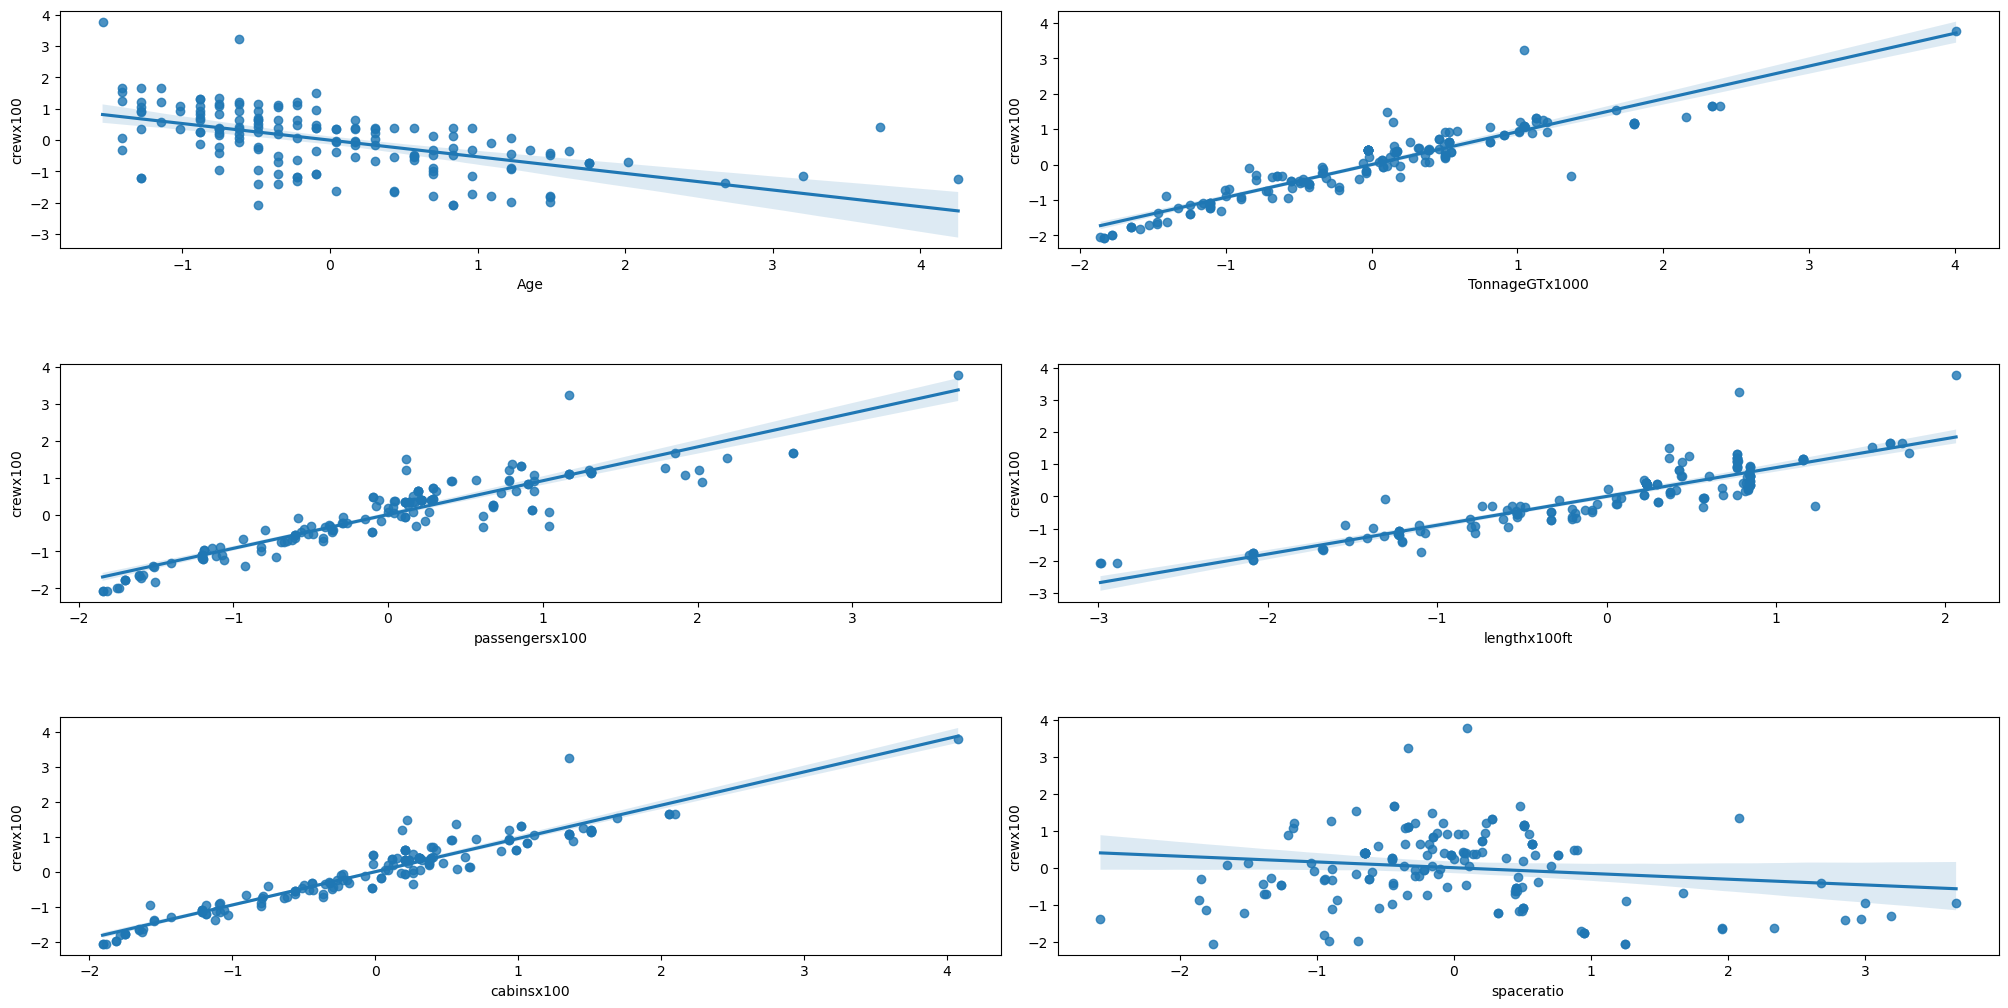

In [15]:
x = df2.iloc[:,0:6 ]
y = df2.iloc[:,6:7]
fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(['Age', 'TonnageGTx1000', 'passengersx100', 'lengthx100ft', 'cabinsx100','spaceratio']):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
### Note: sns.pairplot(dataset); plt.show() would produce plots of all standardized pairs

In [16]:
y = df.iloc[:,6:7]
print(y)

     crewx100
0        3.55
1        3.55
2        6.70
3       19.10
4       10.00
..        ...
153      0.59
154     12.00
155      0.88
156      0.88
157      1.80

[158 rows x 1 columns]


In [17]:
X = df2.iloc[:,0:6 ]
print(x)

          Age  TonnageGTx1000  passengersx100  lengthx100ft  cabinsx100  \
0   -1.276402       -1.104984       -1.193956     -1.225331   -1.184588   
1   -1.276402       -1.104984       -1.193956     -1.225331   -1.184588   
2    1.358105       -0.647310       -0.372926     -0.509363   -0.314095   
3   -0.617775        1.043215        1.169614      0.782736    1.357341   
4    0.172577        0.810215        0.825445      0.441533    0.982670   
..        ...             ...             ...           ...         ...   
153  0.831204       -1.830796       -1.844975     -2.987284   -1.907008   
154 -0.222599        0.148615        0.118448      0.368817    0.188457   
155  1.226380       -1.776662       -1.749603     -2.086730   -1.815023   
156  1.489831       -1.776662       -1.740273     -2.086730   -1.815023   
157  0.962929       -1.523507       -1.594104     -1.096680   -1.631052   

     spaceratio  
0      0.318057  
1      0.318057  
2     -0.940676  
3     -0.338017  
4     -0.

In [18]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) 
print(len(X_train),len(y_train),len(X_test),len(y_test))

110 110 48 48


In [19]:
print(X_train)

          Age  TonnageGTx1000  passengersx100  lengthx100ft  cabinsx100  \
61   0.172577       -0.426651       -0.600990     -0.526143   -0.560885   
2    1.358105       -0.647310       -0.372926     -0.509363   -0.314095   
147 -0.486050       -1.247177       -1.511172     -1.208550   -1.545798   
43  -1.276402        1.097107        2.025890      0.771549    1.384263   
155  1.226380       -1.776662       -1.749603     -2.086730   -1.815023   
..        ...             ...             ...           ...         ...   
9   -1.276402        1.049655        1.922225      0.771549    1.355097   
103 -0.486050        1.012632        0.945697      0.771549    0.935556   
67  -1.408127        1.676442        2.190718      1.565826    1.691628   
117  0.040852       -1.403463       -1.581665     -1.678404   -1.622078   
47   3.729162       -0.025805       -0.056747      0.838671    0.150317   

     spaceratio  
61     0.452755  
2     -0.940676  
147    2.848296  
43    -1.211234  
155   -0.

In [20]:
print(X_test)

          Age  TonnageGTx1000  passengersx100  lengthx100ft  cabinsx100  \
7    0.962929       -0.024727        0.217966      0.234573    0.311852   
44   0.172577        0.104586        0.085275      0.083549    0.181727   
113 -0.222599       -1.104984       -1.200176     -1.230924   -1.209267   
120 -0.617775        0.506725        0.679277      0.833078    0.374671   
63   1.489831       -0.469198       -0.364633     -0.084257   -0.305121   
122  0.040852        0.076858        0.108081      0.575777    0.206406   
121  0.962929       -0.612254        0.180647     -0.677168   -0.186214   
139  0.172577       -0.034616        0.238699      0.301695    0.042627   
109 -0.881226        1.124053        0.858618      0.771549    1.018566   
92   1.753281       -0.708261       -0.692216     -0.330371   -0.791969   
24   0.304302       -0.018287       -0.078517      0.010833   -0.017948   
141 -0.222599        1.797698        1.314746      1.157501    1.512145   
26   0.172577        0.17

In [21]:
print(y_train)

     crewx100
61       5.88
2        6.70
147      2.87
43      10.90
155      0.88
..        ...
9       11.50
103     11.00
67      13.13
117      2.11
47       9.21

[110 rows x 1 columns]


In [22]:
print(y_test)

     crewx100
7        9.20
44       7.66
113      3.73
120      8.48
63       6.12
122      7.60
121      6.71
139      7.20
109     12.38
92       5.20
24       8.58
141     11.76
26       9.09
60       5.88
80       8.00
97      11.00
129     13.60
98       9.00
142      1.60
56       8.42
45       6.36
33       6.70
59       5.88
8        9.20
40       3.85
37       6.36
101     12.38
19       9.20
144      1.60
108      5.20
51       9.45
54       5.57
16      10.30
130      8.22
134     21.00
22      11.60
93       8.50
66       7.00
112      9.00
94       9.00
27       9.99
111     12.00
110      9.00
85       9.59
18       9.30
62       5.61
30       6.70
71       7.40


In [23]:
### see module documentation in https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
### LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)
### copy_X=True -- X will be copied; else, it may be overwritten.
### if fit_intercept = False, intercept will be set to 0.0
### n_jobs=None (same as  = 1), i.e. no use of additional parallel processors
### normalize=False: ignored when fit_intercept is set to False. 
### If True, the regressors X will be normalized before regression by subtracting the mean and dividing by the l2-norm. 
### If you wish to standardize, one could use StandardScaler before calling fit on an estimator with normalize=False.

from sklearn.linear_model import LinearRegression
Linreg = LinearRegression()  
Linreg.fit(X_train, y_train) 
### To retrieve the intercept:
print('Intercept (train):', Linreg.intercept_)
### To retrieving the slope:
print('Slopes (train):', Linreg.coef_)

from sklearn.metrics import r2_score
y_pred_Linreg_train = Linreg.predict(X_train)
### Fitting y using the x_train data
r2_score_Linreg_train = r2_score(y_train, y_pred_Linreg_train)

print('R2_score (train): ', r2_score_Linreg_train)
### R2_score (train) is the R-square in the linear regression involving only the training data set

Intercept (train): [7.80653448]
Slopes (train): [[-0.06850255  0.25812795 -1.42695736  0.82914541  3.68927452  0.02995278]]
R2_score (train):  0.9118485946473178


In [24]:
from sklearn.metrics import mean_squared_error
### Predicting RMSE -- the Training set results
mse_Linreg_train = (mean_squared_error(y_train, y_pred_Linreg_train))
rmse_Linreg_train = (np.sqrt(mean_squared_error(y_train, y_pred_Linreg_train)))
print("MSE: ", mse_Linreg_train)
print("RMSE: ", rmse_Linreg_train)

MSE:  1.1443316469504705
RMSE:  1.069734381494056


In [25]:
### Predicting R2 Score using Test Set but Intercept(train) and Slopes(train) from Training results
y_pred = Linreg.intercept_ + np.dot(X_test,Linreg.coef_.T)
rmse_y_pred = (np.sqrt(mean_squared_error(y_test, y_pred)))
def tss(y_test):
    return ((y_test - np.mean(y_test))**2).sum()
R2_pred=1-(48*(rmse_y_pred)**2)/tss(y_test)
print("Pred_RMSE:",rmse_y_pred)
print("R2_pred: %.15f" % R2_pred)


Pred_RMSE: 0.650404310600993
R2_pred: 0.957979988701403


C:\Users\kglim\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [26]:
### below gives the test R2 score -- another way besides [21] that shows the calculation explicitly
y_pred_Linreg_test = Linreg.predict(X_test)
r2_score_Linreg_test = r2_score(y_test, y_pred_Linreg_test)
print('R2_score (test): ', r2_score_Linreg_test)
### R2_score (test) is the R-square in the linear regression involving fitted training coeffs and test data set

R2_score (test):  0.957979988701403


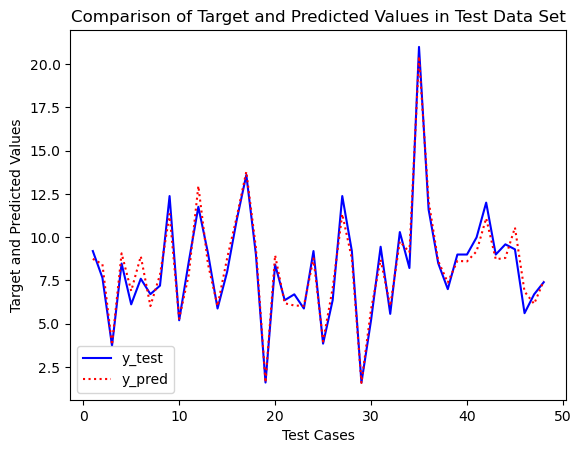

In [27]:
import matplotlib.pyplot as plt
d = np.linspace(1, 48, 48)
### creates t ranging from values 1 to 98 with number of points (3rd argument) as 98

plt.plot(d, y_test, 'blue', linestyle='solid') ### plotting d, y_test separately 
plt.plot(d, y_pred, 'red', linestyle='dotted') ### plotting t, y_pred separately 
plt.xlabel('Test Cases')
plt.ylabel('Target and Predicted Values')
plt.title('Comparison of Target and Predicted Values in Test Data Set')
plt.legend(["y_test", "y_pred"], loc ="lower left")
plt.show()
### See linestyles in https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html
### See also https://matplotlib.org/2.0.2/users/pyplot_tutorial.html

In [28]:
from sklearn import linear_model
Ridge=linear_model.Ridge(alpha=.05,)
Ridge.fit(X_train, y_train) ### training the algorithm, note regression is done without normalizing the X, y
### To retrieve the intercept:
print('Intercept (train):', Ridge.intercept_)
### To retrieving the slope:
print('Slopes (train):', Ridge.coef_)

from sklearn.metrics import r2_score
y_pred_ridge_train = Ridge.predict(X_train)
### Fitting y using the x_train data
r2_score_ridge_train = r2_score(y_train, y_pred_ridge_train)

print('R2_score (train): ', r2_score_ridge_train)
### R2_score (train) is the R-square in the linear regression involving only the training data set

Intercept (train): [7.80658318]
Slopes (train): [[-0.06771503  0.27680153 -1.36935954  0.83123131  3.61075632  0.02745032]]
R2_score (train):  0.9118361432473698


In [29]:
### Predicting R2 Score using Test Set but Intercept(train) and Slopes(train) from Ridge Training results
y_pred_Ridge = Ridge.intercept_ + np.dot(X_test,Ridge.coef_.T)
rmse_y_pred_Ridge = (np.sqrt(mean_squared_error(y_test, y_pred_Ridge)))
def tss(y_test):
    return ((y_test - np.mean(y_test))**2).sum()
R2_pred_Ridge = 1-(48*(rmse_y_pred_Ridge)**2)/tss(y_test)
print("Pred_RMSE_Ridge:",rmse_y_pred_Ridge)
print("R2_pred_Ridge:",R2_pred_Ridge)

Pred_RMSE_Ridge: 0.6490133788743173
R2_pred_Ridge: crewx100    0.95816
dtype: float64


C:\Users\kglim\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [30]:
from sklearn import linear_model
Lasso=linear_model.Lasso(alpha=0.01,)
Lasso.fit(X_train, y_train) ### training the algorithm, note regression is done without normalizing the X, y
### To retrieve the intercept:
print('Intercept (train):', Lasso.intercept_)
### To retrieving the slope:
print('Slopes (train):', Lasso.coef_)

from sklearn.metrics import r2_score
y_pred_ridge_train = Lasso.predict(X_train)
### Fitting y using the x_train data
r2_score_lasso_train = r2_score(y_train, y_pred_ridge_train)

print('R2_score (train): ', r2_score_lasso_train)
### R2_score (train) is the R-square in the linear regression involving only the training data set

Intercept (train): [7.80243921]
Slopes (train): [-0.05081069  0.11904811 -0.81767346  0.84627291  3.21345059  0.07302589]
R2_score (train):  0.9109477560568731


In [31]:
### Predicting R2 Score using Test Set but Intercept(train) and Slopes(train) from Lasso Training results
y_pred_Lasso = Lasso.intercept_ + np.dot(X_test,Lasso.coef_.T)
rmse_y_pred_Lasso = (np.sqrt(mean_squared_error(y_test, y_pred_Lasso)))
def tss(y_test):
    return ((y_test - np.mean(y_test))**2).sum()
R2_pred_Lasso = 1-(48*(rmse_y_pred_Lasso)**2)/tss(y_test)
print("Pred_RMSE_Lasso:",rmse_y_pred_Lasso)
print("R2_pred_Lasso:",R2_pred_Lasso)

Pred_RMSE_Lasso: 0.6597965063785994
R2_pred_Lasso: crewx100    0.956758
dtype: float64


C:\Users\kglim\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Preparing for k-fold Cross-Validation

In [32]:
### Now k-fold cross validation is to be performed on X_train y_train, leaving test set intact
### Predicting Cross Validation Score 
### By default cross_val_score uses the scoring provided in the given estimator, which is r2 score here
### Details of other scoring methods and metrics can be found in https://scikit-learn.org/stable/modules/model_evaluation.html

from sklearn.model_selection import cross_val_score
scoresLinreg = cross_val_score(estimator = Linreg, X = X_train, y = y_train, cv = 4)
print(scoresLinreg)
### Score is R2 measure, there are 4 scores since k=cv=4, one for each repetition 
print("%0.5f mean R2 with a standard deviation of %0.5f" % (scoresLinreg.mean(), scoresLinreg.std()))

[0.87938812 0.83344863 0.94233134 0.97065224]
0.90646 mean R2 with a standard deviation of 0.05355


In [33]:
### Now k-fold cross validation is to be performed on X_train y_train dataset in [16], leaving test set intact
### Predicting Cross Validation Score 
### By default cross_val_score uses the scoring provided in the given estimator, which is r2 score here

from sklearn import linear_model
Ridge=linear_model.Ridge(alpha=0.05,)
### Do not need to specify Lasso.fit(X_train, y_train) 
### Above steps may be repeated in order to try different hyperparameter of alpha and select one with highest ave R2

from sklearn.model_selection import cross_val_score
scoresRidge = cross_val_score(estimator = Ridge, X = X_train, y = y_train, cv = 4)
print(scoresRidge)
### Score is R2 measure, there are 4 scores since k=cv=4, one for each repetition 
print("%0.5f mean R2 with a standard deviation of %0.5f" % (scoresRidge.mean(), scoresRidge.std()))

[0.8804058  0.83267197 0.94295746 0.97064257]
0.90667 mean R2 with a standard deviation of 0.05379


In [34]:
### Now k-fold cross validation is to be performed on X_train y_train reshuffled dataset in [16], leaving test set intact
### Predicting Cross Validation Score 
### By default cross_val_score uses the scoring provided in the given estimator, which is r2 score here

from sklearn import linear_model
Ridge=linear_model.Lasso(alpha=0.01,)
### Do not need to specify Lasso.fit(X_train, y_train) 
### Above steps may be repeated in order to try different hyperparameter of alpha and select one with highest ave R2

from sklearn.model_selection import cross_val_score
scoresLasso = cross_val_score(estimator = Lasso, X = X_train, y = y_train, cv = 4)
print(scoresLasso)
### Score is R2 measure, there are 4 scores since k=cv=4, one for each repetition 
print("%0.5f mean R2 with a standard deviation of %0.5f" % (scoresLasso.mean(), scoresLasso.std()))

[0.88414514 0.82990918 0.94387686 0.96812388]
0.90651 mean R2 with a standard deviation of 0.05376
